# Personal Data

In [1]:
student_number = 'a01272463'
Name = 'Matthew'
Last_Name = 'Puyat' 

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    # noise generated with mean of 0 and a standard deviation of 10.0 by default
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2*X**6 - 0.5*X**5 + 2*X**4 - 5*X**3 + 3*X**2 - 10*X + 5 + noise
    
    # This resahpes it into a 2d array and prevents the 1d array error in step 3
    X = X.reshape(-1,1)
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

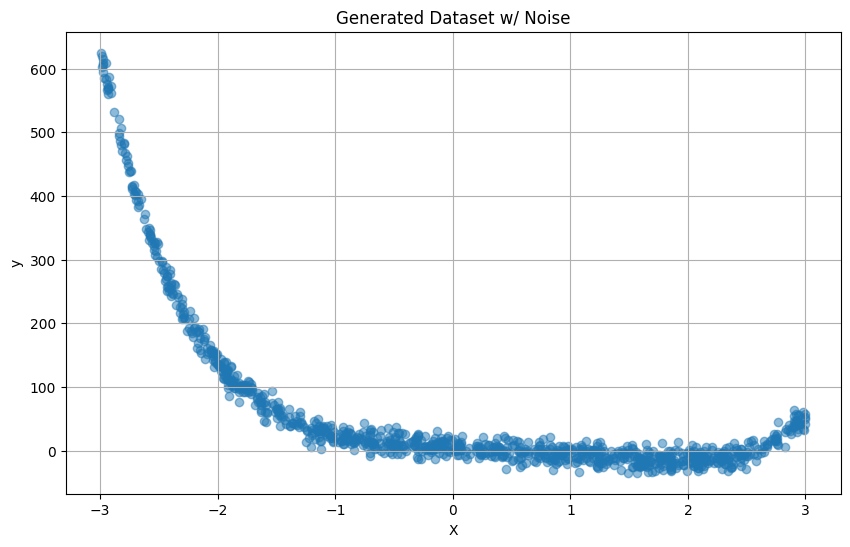

In [4]:
X, y = generate_dataset(-3, 3)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Dataset w/ Noise')
plt.grid(True)
plt.show()
# TODO: Visualize the dataset using scatter


## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
from sklearn.model_selection import train_test_split
# TODO: Split dataset into the training and the in-range testing sets
# Split dataset into training and in-range testing sets
# Note to self: X values are input [[]] and y values are ouput []
# Another note to self: random_state is set to 42 like in the warm up for consistent results
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate out-of-range testing set with same length as in-range test set
X_test_out_range, y_test_out_range = generate_dataset(
    5, 7, # in range is (-3,3) so out of range would be (5,7)
    num_samples=len(X_test_in_range), 
    noise_std=10.0
)

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

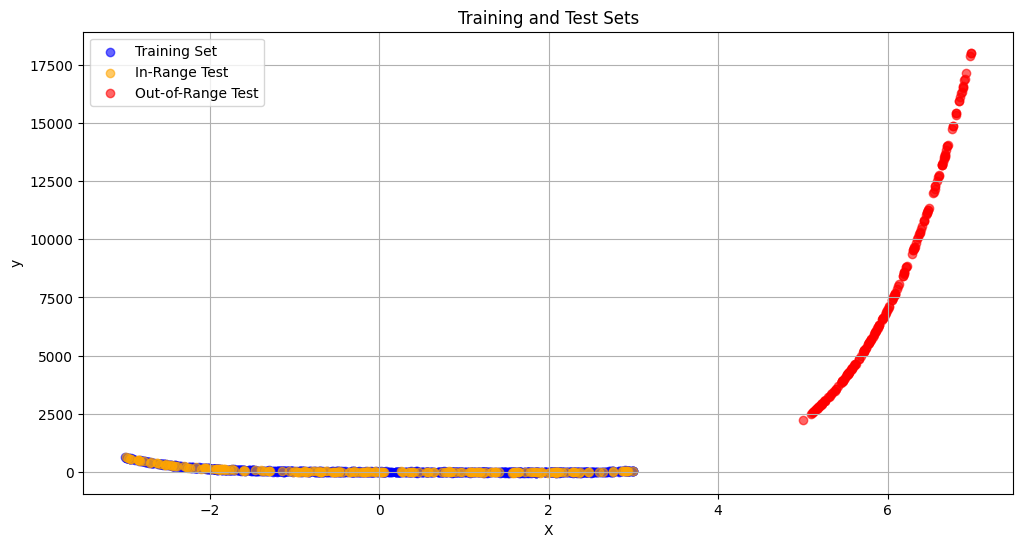

In [6]:
# TODO: Visualize the sets using scatter (or other plots)
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, alpha=0.6, label='Training Set', color='blue')
plt.scatter(X_test_in_range, y_test_in_range, alpha=0.6, label='In-Range Test', color='orange')
plt.scatter(X_test_out_range, y_test_out_range, alpha=0.6, label='Out-of-Range Test', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    # Notes
    # a model is just a formula that tries to find the weights to predict output(Y)
    # The weights are the coefficients, and not the actual X values - those are inputs
    model = make_pipeline(
        PolynomialFeatures(degree=degree), 
        LinearRegression() # The find the best weights fn
    )
    # Weights arren't known yet until this is called
    model.fit(X,y) # similar to the w = (X^T * X)^-1 * X^T * y
    
    
    return model

In [8]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for d in range(2,degree + 1 ):
    models[d] = train_models(X_train, y_train, d)



## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = {}
    for degree, model in models.items():
        # Uses the model to try and predict with inputs (X)
        y_pred = model.predict(X_test)
        # Calculates the MSE between the actual and pred
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [10]:
# TODO: Evaluate models on both the train and the test sets.
# Evaluate models on the training set
train_losses = evaluate_models(models, X_train, y_train)

# Evaluate models on the in-range test set
test_in_range_losses = evaluate_models(models, X_test_in_range, y_test_in_range)

# Evaluate models on the out-of-range test set
test_out_range_losses = evaluate_models(models, X_test_out_range, y_test_out_range)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

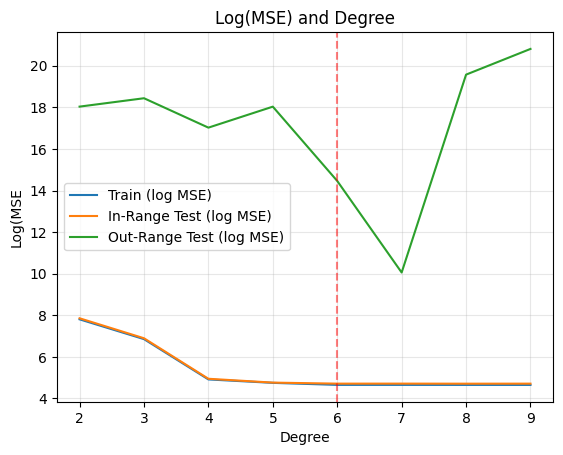

In [11]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
# Note to self - in testing, the out of range test seems to change here and there around point 7 - and then almost the same thing with point 4 for in-range test.
degrees = [2,3,4,5,6,7,8,9]
log_tl = [np.log(train_losses[d]) for d in degrees]
log_tirl = [np.log(test_in_range_losses[d]) for d in degrees]
log_torl = [np.log(test_out_range_losses[d]) for d in degrees]

# TODO: Plot the log MSE results
plt.plot(degrees, log_tl, label='Train (log MSE)')
plt.plot(degrees, log_tirl, label='In-Range Test (log MSE)')
plt.plot(degrees, log_torl, label='Out-Range Test (log MSE)')
plt.xlabel('Degree')
plt.ylabel('Log(MSE')
plt.title('Log(MSE) and Degree')
plt.legend()
plt.grid(alpha=0.3)

# Mark the best degree (degree 6)
plt.axvline(x=6, color='red', linestyle='--', alpha=0.5)

plt.show()

In [12]:
# TODO: Print each model loss on the training and the two test sets
print(f"{'Degree':<10} {'Train MSE':<20} {'In-Range Test MSE':<20} {'Out-Range Test MSE':<20}")

for degree in range(2, 10):
    print(f"{degree:<10} {train_losses[degree]:<20.2f} {test_in_range_losses[degree]:<20.2f} {test_out_range_losses[degree]:<20.2f}")

# best for in range test
best_degree_in_range = min(range(2, 10), key=lambda d: test_in_range_losses[d])
# best for out of range test
best_degree_out_range = min(range(2, 10), key=lambda d: test_out_range_losses[d])

print(f"\nin-range test - Best: {best_degree_in_range} (MSE: {test_in_range_losses[best_degree_in_range]:.2f})")
print(f"out-range test - Best: {best_degree_out_range} (MSE: {test_out_range_losses[best_degree_out_range]:.2f})")

Degree     Train MSE            In-Range Test MSE    Out-Range Test MSE  
2          2451.22              2578.28              67994263.46         
3          945.70               985.91               101742883.58        
4          136.06               140.49               24736502.11         
5          115.36               116.82               67881325.19         
6          104.68               111.15               1903824.75          
7          104.67               111.25               23282.76            
8          104.55               110.90               316751916.60        
9          104.49               111.11               1090548004.90       

in-range test - Best: 8 (MSE: 110.90)
out-range test - Best: 7 (MSE: 23282.76)


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** Write your answer here</span>
The bias-variance tradeoff demonstrates what effects happen from when your model is too simple or too complex. When the model is simple, its shows a high bias but has low variance (as its consistently wrong), and when the model is too complex, it has a low bias but a high variance (results vary a lot). We can see these in the evaluations above.
Starting with a simple model in degree 2, we can observe from all of the evaluations that the MSE is very high. In contrast, with degree 9, we see that the MSE is low in both the Train and In-range test MSE but very high in the out of range test MSE. Our goal is to find the right degree where all evaluations are low - which looks like degree 6 at (101.75, 106.95, 772451.54). Note that this number changes per re-run but on average degree 6 seems to be the sweet spot. Degree 6 shows that it's able to predict a pattern without memorizing so much of the noise from the training, making it a good degree.

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** Write your answer here</span>
In low complexity models where the degrees are between 2 - 4 we can see that the models showed high error across the data sets with the degree of 2 being the highest MSE at 2550.34 and in range MSE of 2666.93. This shows underfitting where the model is too simple, resulting in higher errors. As the models get more complex, starting at degree 5, the errors decrease which is what we're aiming for. In contrast, when the model is too complex around degrees 7-9, the MSE for the out of range test has a lot more variance. At degree 9, we can see that although the training and in range testing MSE are low compred to the earlier degrees - the out of range MSE is much higher. The models high complexity shows overfitting where the models too accustomed to the training data (memorizing the noise) that it doesn't predict the out of range tests well. These losses show that increasing the complexity reduces bias but increases variance. Degree 6 seems to account for both these factors properly where we a low MSE on all the evaluations.

# Regularization (50 Points)

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [13]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset
df = pd.read_csv(file_path)
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [14]:
# TODO: you can use .info() and .description()
print(df.info())
print(df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000

# Preprocessing

In [15]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.
df_processed = df.copy()
df_processed['sex'] = LabelEncoder().fit_transform(df_processed['sex'])
df_processed['smoker'] = LabelEncoder().fit_transform(df_processed['smoker'])
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

X = df_processed.drop('charges', axis=1)
y = df_processed['charges']




In [24]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2)
# Scaling added to standardize the range of values. Otherwise makes the coefficients too 'wild' and reuslts in an error when adding polynomial features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training

Fit a linear regressor to the data.

In [32]:
# TODO: Use sklearn
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Get the coefficients of the variables and visualize it

In [33]:
# TODO:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
feature_names = X_train.columns

print(f"Intercept (w0): ${intercept:,.2f}")
print("\nCoefficients for each feature:")

# Note to self: chart means if this feature increases by 1 then look for the corresponding unit for it's decrease/increase
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature:<20}: ${coef:>10,.2f}")


MODEL COEFFICIENTS
Intercept (w0): $13,294.31

Coefficients for each feature:
age                 : $  3,622.03
sex                 : $     67.98
bmi                 : $  2,115.12
children            : $    520.86
smoker              : $  9,714.48
region_northwest    : $   -176.99
region_southeast    : $   -652.13
region_southwest    : $   -477.52


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [97]:
# TODO: Use Lasso from sklearn library
lasso_model = Lasso(alpha=1.0,max_iter=10000) # the default isn't enough, otherwise error
lasso_model.fit(X_train_scaled, y_train)
lasso_model_100 = Lasso(alpha=100.0,max_iter=10000) # the default isn't enough, otherwise error
lasso_model_100.fit(X_train_scaled, y_train)

print(f"Lasso model with alpha = 1.0")

# Get coefficients
# note to self - at alpha 100 irrelevant features get's zero;d out
print(f"\n{'feature':<20} {'alpha=1.0':<15} {'alpha=100':<10} ")
for feature, coef1, coef2 in zip(X_train.columns, lasso_model.coef_, lasso_model_100.coef_):
    print(f"{feature:<20}: ${coef1:>10,.2f} ${coef2:>10,.2f}")

Lasso model with alpha = 1.0

feature              alpha=1.0       alpha=100  
age                 : $  3,621.17 $  3,536.09
sex                 : $     67.12 $      0.00
bmi                 : $  2,113.74 $  1,976.37
children            : $    519.89 $    425.04
smoker              : $  9,713.48 $  9,610.58
region_northwest    : $   -173.90 $     -0.00
region_southeast    : $   -648.53 $   -361.60
region_southwest    : $   -474.31 $   -222.61


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [98]:
# TODO: Use Ridge from sklearn library
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_model_100 = Ridge(alpha=100.0)
ridge_model_100.fit(X_train_scaled, y_train)
# note to self - at alpha 100 other features start to compensate for larger values 
print(f"Ridge model comparison")
print(f"\n{'Feature':<20} {'alpha=1.0':<15} {'alpha=100':<10}")
for feature, coef1, coef2 in zip(X_train.columns, ridge_model.coef_, ridge_model_100.coef_):
    print(f"{feature:<20}: ${coef1:>10,.2f} ${coef2:>10,.2f}")

Ridge model comparison

Feature              alpha=1.0       alpha=100 
--------------------------------------------------
age                 : $  3,618.68 $  3,314.20
sex                 : $     68.68 $    125.54
bmi                 : $  2,112.99 $  1,926.42
children            : $    520.48 $    485.19
smoker              : $  9,705.18 $  8,865.44
region_northwest    : $   -176.12 $   -118.90
region_southeast    : $   -649.57 $   -449.51
region_southwest    : $   -476.04 $   -366.44


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [82]:
# TODO: Use folding methods and mape from sklearn library
# Define range of alpha values to test
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # common alpha tests
kfold = KFold(n_splits=5)

lasso_scores = []
ridge_scores = []

print(f"{'Alpha':<15} {'Lasso MAPE':<20} {'Ridge MAPE':<20}")
for alpha in alphas:
    # For Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso_cv = cross_val_score(lasso, X_train_scaled, y_train, cv=kfold, 
                                scoring='neg_mean_absolute_percentage_error')
    lasso_mape = -lasso_cv.mean()
    lasso_scores.append(lasso_mape)

    # fOr Ridge
    ridge = Ridge(alpha=alpha,max_iter=10000)
    ridge_cv = cross_val_score(ridge, X_train_scaled, y_train, cv=kfold, 
                                scoring='neg_mean_absolute_percentage_error')
    ridge_mape = -ridge_cv.mean()
    ridge_scores.append(ridge_mape)
    
    print(f"{alpha:<15} {lasso_mape:<20.4f} {ridge_mape:<20.4f}")

best_lasso_idx = np.argmin(lasso_scores)
best_ridge_idx = np.argmin(ridge_scores)

print(f"\nBest Lasso alpha: {alphas[best_lasso_idx]}")
print(f"Best Ridge alpha: {alphas[best_ridge_idx]}") # note that values are tied.

# Lasso shrinks unimportant values here to 0 (thus the changes aren't as drastic in comparison to RIDGE MAPE where everything is shrunk)
# At low alpha (0.001 -> 1) - penalty isn't big enough to getter. When the penaty is bigger, it gets better at removing noisy features while ridge gets worse.


Alpha           Lasso MAPE           Ridge MAPE          
0.001           0.4242               0.4242              
0.01            0.4242               0.4242              
0.1             0.4242               0.4242              
1               0.4242               0.4244              
10              0.4238               0.4266              
100             0.4234               0.4688              
1000            0.5246               0.9364              

Best Lasso alpha: 100
Best Ridge alpha: 0.001


Add extra variables to dataset to make model more complex, then compare the results. 

In [84]:

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

scaler_poly = StandardScaler()
X_train_poly = scaler_poly.fit_transform(X_train_poly)
X_test_poly = scaler_poly.transform(X_test_poly)

alphas_poly = [0.1, 1, 10, 100, 1000] # common alpha tests (removed lower ones as it gives warning,and the values are too small for meaningful changes)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")

lasso_scores_poly = []
ridge_scores_poly = []

print(f"\n{'Alpha':<15} {'Lasso MAPE':<20} {'Ridge MAPE':<20}")
print("-"*55)

for alpha in alphas_poly:
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=50000) # increased iterations to avoid warnings. 
    lasso_cv = cross_val_score(
        lasso, X_train_poly, y_train,
        cv=kfold,
        scoring='neg_mean_absolute_percentage_error'
    )
    lasso_mape = -lasso_cv.mean()
    lasso_scores_poly.append(lasso_mape) 
    # Ridge
    ridge = Ridge(alpha=alpha, max_iter=50000)
    ridge_cv = cross_val_score(
        ridge, X_train_poly, y_train,
        cv=kfold,
        scoring='neg_mean_absolute_percentage_error'
    )
    ridge_mape = -ridge_cv.mean()
    ridge_scores_poly.append(ridge_mape)   # ← append to NEW list
    print(f"{alpha:<15} {lasso_mape:<20.4f} {ridge_mape:<20.4f}")

# Find best alphas for polynomial models
best_lasso_poly_idx = np.argmin(lasso_scores_poly)
best_ridge_poly_idx = np.argmin(ridge_scores_poly)

print(f"Best Lasso alpha (poly): {alphas_poly[best_lasso_poly_idx]}")
print(f"Best Ridge alpha (poly): {alphas_poly[best_ridge_poly_idx]}")
print("Compared with the previous one with less variables, the MAPE is reduced quite a bit")


Original features: 8
Polynomial features: 44

Alpha           Lasso MAPE           Ridge MAPE          
-------------------------------------------------------
0.1             0.3043               0.3044              
1               0.3044               0.3050              
10              0.3048               0.3110              
100             0.3170               0.3739              
1000            0.5003               0.7921              
Best Lasso alpha (poly): 0.1
Best Ridge alpha (poly): 0.1
Compared with the previous one with less variables, the MAPE is reduced quite a bit


Report your best model with its evaluated results.

In [81]:
# TODO: Print each model's loss on the training and the test set.

print("Side by Side comparison on model's loss")
print(f"{'Model':<30} {'Train MSE':<20} {'Test MSE':<20} {'Test MAPE':<20}")
lasso_best = Lasso(alpha=alphas[best_lasso_idx], max_iter=10000, random_state=42)
lasso_best.fit(X_train_scaled, y_train)

ridge_best = Ridge(alpha=alphas[best_ridge_idx], max_iter=10000, random_state=42)
ridge_best.fit(X_train_scaled, y_train)

# Linear Regression
y_train_pred_lr = model.predict(X_train_scaled)
y_test_pred_lr = model.predict(X_test_scaled)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_mape_lr = mean_absolute_percentage_error(y_test, y_test_pred_lr)
print(f"{'Linear Regression':<30} ${train_mse_lr:<19,.2f} ${test_mse_lr:<19,.2f} {test_mape_lr:<19.4f}")

# Lasso
y_train_pred_lasso = lasso_best.predict(X_train_scaled)
y_test_pred_lasso = lasso_best.predict(X_test_scaled)
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_mape_lasso = mean_absolute_percentage_error(y_test, y_test_pred_lasso)
print(f"{'Lasso':<30} ${train_mse_lasso:<19,.2f} ${test_mse_lasso:<19,.2f} {test_mape_lasso:<19.4f}")

# Ridge
y_train_pred_ridge = ridge_best.predict(X_train_scaled)
y_test_pred_ridge = ridge_best.predict(X_test_scaled)
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_mape_ridge = mean_absolute_percentage_error(y_test, y_test_pred_ridge)
print(f"{'Ridge':<30} ${train_mse_ridge:<19,.2f} ${test_mse_ridge:<19,.2f} {test_mape_ridge:<19.4f}")

# Linear Regression + Polynomial
y_train_pred_lr_poly = lr_poly.predict(X_train_poly)
y_test_pred_lr_poly = lr_poly.predict(X_test_poly)
train_mse_lr_poly = mean_squared_error(y_train, y_train_pred_lr_poly)
test_mse_lr_poly = mean_squared_error(y_test, y_test_pred_lr_poly)
test_mape_lr_poly = mean_absolute_percentage_error(y_test, y_test_pred_lr_poly)
print(f"{'Linear + Polynomial':<30} ${train_mse_lr_poly:<19,.2f} ${test_mse_lr_poly:<19,.2f} {test_mape_lr_poly:<19.4f}")

# Lasso + Polynomial
y_train_pred_lasso_poly = lasso_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_poly.predict(X_test_poly)
train_mse_lasso_poly = mean_squared_error(y_train, y_train_pred_lasso_poly)
test_mse_lasso_poly = mean_squared_error(y_test, y_test_pred_lasso_poly)
test_mape_lasso_poly = mean_absolute_percentage_error(y_test, y_test_pred_lasso_poly)
print(f"{'Lasso + Polynomial':<30} ${train_mse_lasso_poly:<19,.2f} ${test_mse_lasso_poly:<19,.2f} {test_mape_lasso_poly:<19.4f}")

# Ridge + Polynomial
y_train_pred_ridge_poly = ridge_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_poly.predict(X_test_poly)
train_mse_ridge_poly = mean_squared_error(y_train, y_train_pred_ridge_poly)
test_mse_ridge_poly = mean_squared_error(y_test, y_test_pred_ridge_poly)
test_mape_ridge_poly = mean_absolute_percentage_error(y_test, y_test_pred_ridge_poly)
print(f"{'Ridge + Polynomial':<30} ${train_mse_ridge_poly:<19,.2f} ${test_mse_ridge_poly:<19,.2f} {test_mape_ridge_poly:<19.4f}")


Side by Side comparison on model's loss
Model                          Train MSE            Test MSE             Test MAPE           
Linear Regression              $36,678,351.30       $36,098,170.89       0.4215             
Lasso                          $36,783,805.60       $35,679,127.28       0.4214             
Ridge                          $36,678,351.30       $36,098,157.24       0.4215             
Linear + Polynomial            $44,630,395.49       $45,212,263.63       0.4017             
Lasso + Polynomial             $22,176,412.86       $24,241,327.41       0.3120             
Ridge + Polynomial             $44,630,399.34       $45,212,259.31       0.4017             


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** Write your answer here</span
At alpha 1.0, both lasso and ridge similar results in their weight distributions with 8 active features and similar coefficient values. For example, smoker, one of the top features, shows up at 9,713, and 9705 for lasson and ridge respectively. There's barely any difference because the penalty is too weak to have an effect. The effect becomes more pronounced at alpha 100 where features are zero'd out in Lasso (sex, and region_northwest) ensuring a more 'relevant' features get featured. In Ridge, smoker actually gets penalized and sex increases from 68 to 215 to compensate. This shows the difference between the regularization - Lasso produces a sparse solution, ensuring each feature is absolutely necessary, while ridge produces


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** Write your answer here</span>
- Initially from alpha values at 0.001 to 1, the features behaved the same as linear regression because the penalty was too small to matter. But we can see as the alpha increased from 1, the changes became more apparent. At alpha = 100, the difference between Lasso and Ridge are shown in their MAPE values at 0.4234 and 0.4688 respectively. These become even more pronounced at alpha=1000 where the Lasso is at 0.5246 and Ridge is at 0.9364 which is drastically worse. This helps the models explainability because Lasso's model clearly communicates which features have an impact (i.e, smoker) and which does not (i.e, sex) where as Ridge just indiscriminately penalizes each weight.

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** Write your answer here</span>
Dimension expansion through polynomial features increased the feature count from 8 to 44 making it more complex. Without regularization, linear regression would overfit these 44 features where training MAPE would drop but test MAPE gets worse as it starts to memorize noise. With regularization, especially lasso, we can see how with the added complexity, it's still able to deliver a pattern that filters out the noise (0.3120) in contrast to ridge where it just penalizes all weights.